# API Data Wrangling with Open-Meteo

In this exercise, we will:

- Fetch historical weather data using the **Open-Meteo API**.
- Parse and clean the data using **pandas**.
- Perform exploratory data analysis.
- Visualize weather trends.

In [2]:
# Install required packages if not already installed
# !pip install requests pandas matplotlib --quiet

In [3]:
# Import Libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Optional: Configure matplotlib for inline display in Jupyter
%matplotlib inline

## Understand the Open-Meteo API

- **API Endpoint**: `https://archive-api.open-meteo.com/v1/archive`
- **Parameters**:
  - `latitude`: Latitude of the location.
  - `longitude`: Longitude of the location.
  - `start_date`: Start date of the data (YYYY-MM-DD).
  - `end_date`: End date of the data (YYYY-MM-DD).
  - `hourly`: Comma-separated list of variables (e.g., temperature, precipitation).
  - `timezone`: Timezone of the data.

**Documentation**: [Open-Meteo API Docs](https://open-meteo.com/en/docs)

In [5]:
# Step 1: Set Up Parameters

# Location coordinates for New York City
latitude = 40.7128
longitude = -74.0060

# Date range
start_date = '2023-01-01'
end_date = '2023-01-07'  # One week of data

# Variables to fetch
hourly_variables = ['temperature_2m', 'relativehumidity_2m', 'precipitation']


In [6]:
# Step 2: Make the API Request

base_url = 'https://archive-api.open-meteo.com/v1/archive'

params = {
    'latitude': latitude,
    'longitude': longitude,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/New_York'
}

response = requests.get(base_url, params=params)


In [7]:
# Check if the request was successful

if response.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response.status_code}')


Data fetched successfully!


In [8]:
# Step 3: Load Data into pandas DataFrame

data = response.json()
hourly_data = data['hourly']

df = pd.DataFrame(hourly_data)
df.head()


time  temperature_2m  relativehumidity_2m  precipitation
0  2023-01-01T00:00            10.5                   99            1.0
1  2023-01-01T01:00            10.4                   98            0.1
2  2023-01-01T02:00            10.3                   96            0.0
3  2023-01-01T03:00             9.7                   95            0.0
4  2023-01-01T04:00             9.0                   95            0.0

In [9]:
# Step 4: Data Cleaning

# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Set 'time' as the index
df.set_index('time', inplace=True)

# Check for missing values
df.isnull().sum()


temperature_2m         0
relativehumidity_2m    0
precipitation          0
dtype: int64

In [10]:
# Handle missing values (if any)
#df.fillna(method='ffill', inplace=True)  # Forward fill
df.ffill()


temperature_2m  relativehumidity_2m  precipitation
time                                                                   
2023-01-01 00:00:00            10.5                   99            1.0
2023-01-01 01:00:00            10.4                   98            0.1
2023-01-01 02:00:00            10.3                   96            0.0
2023-01-01 03:00:00             9.7                   95            0.0
2023-01-01 04:00:00             9.0                   95            0.0
...                             ...                  ...            ...
2023-01-07 19:00:00             3.8                   64            0.0
2023-01-07 20:00:00             3.3                   66            0.0
2023-01-07 21:00:00             2.4                   72            0.0
2023-01-07 22:00:00             2.0                   74            0.0
2023-01-07 23:00:00             1.9                   73            0.0

[168 rows x 3 columns]

In [11]:
# Step 5: Exploratory Data Analysis

# Summary Statistics
df.describe()

temperature_2m  relativehumidity_2m  precipitation
count      168.000000           168.000000     168.000000
mean         8.319048            86.267857       0.136905
std          3.525764            12.804132       0.431063
min          0.400000            45.000000       0.000000
25%          5.875000            81.000000       0.000000
50%          8.200000            90.000000       0.000000
75%         11.100000            97.000000       0.000000
max         17.900000           100.000000       3.100000

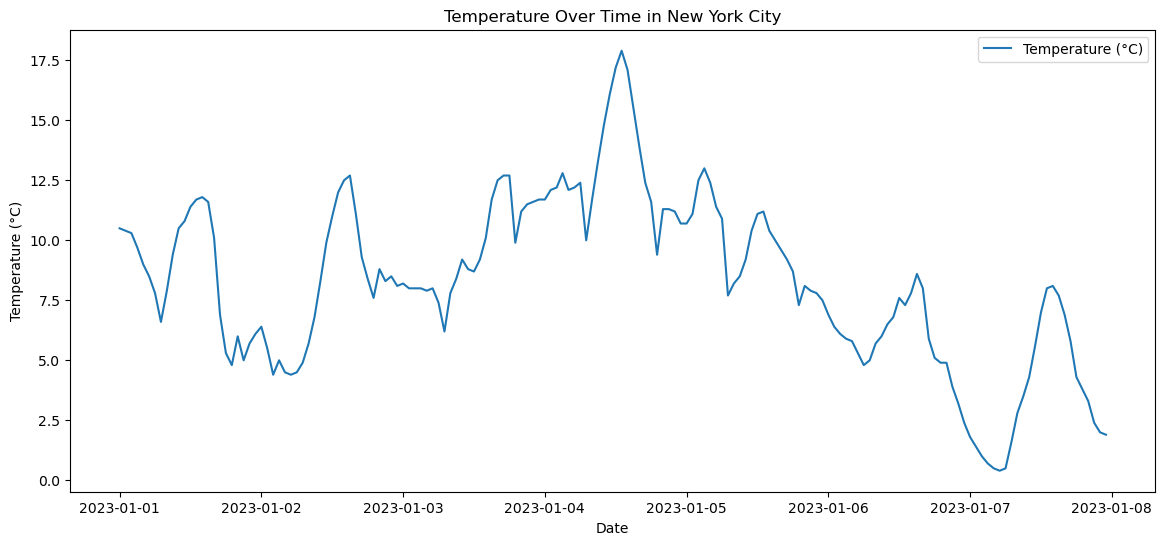

In [12]:
# Plot Temperature Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['temperature_2m'], label='Temperature (°C)')
plt.title('Temperature Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

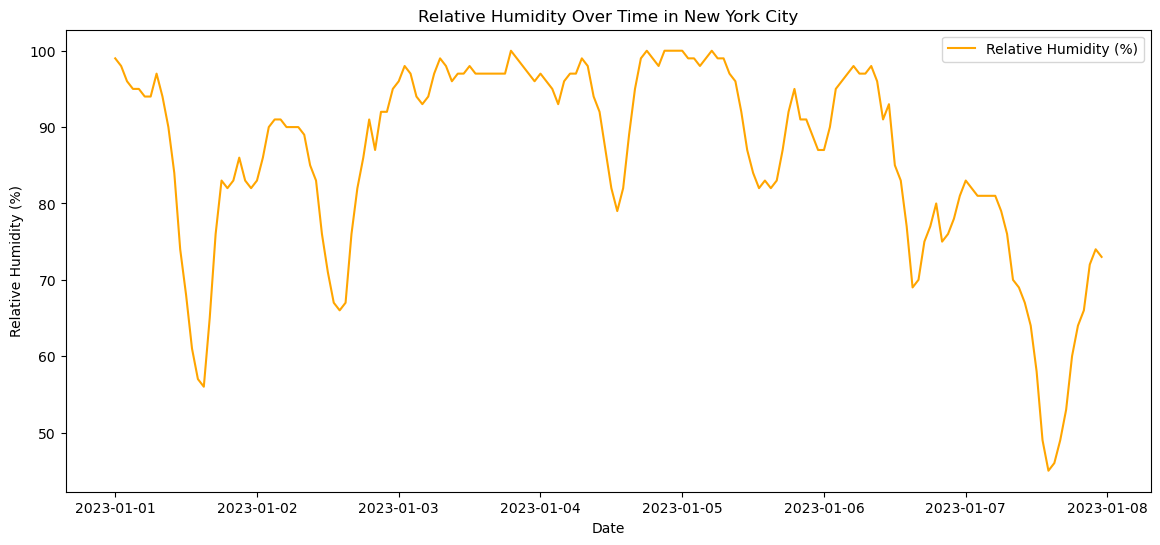

In [13]:
# Plot Relative Humidity Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['relativehumidity_2m'], color='orange', label='Relative Humidity (%)')
plt.title('Relative Humidity Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.legend()
plt.show()


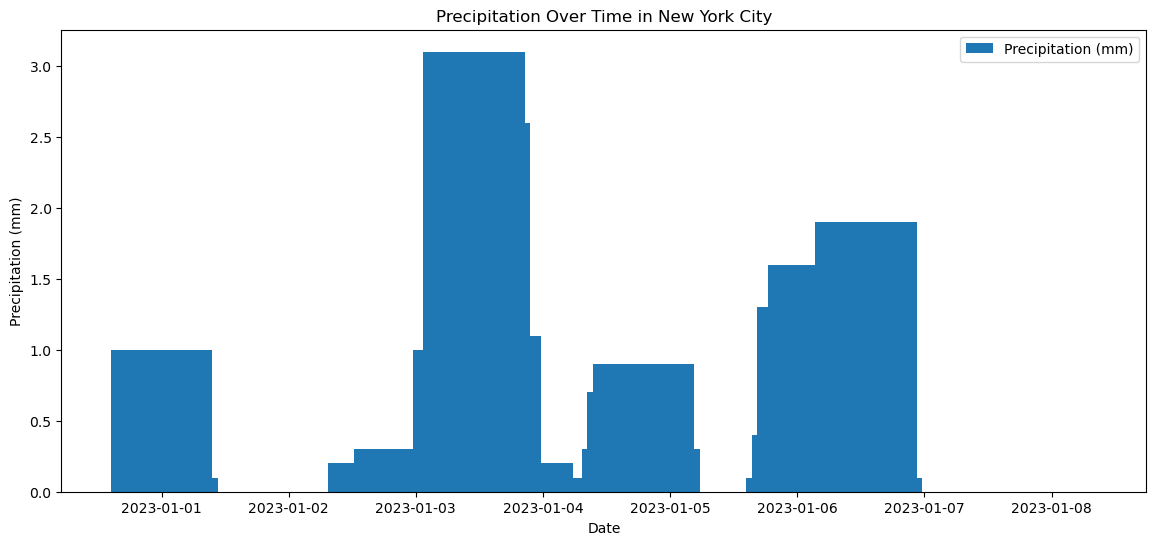

In [14]:
# Plot Precipitation Over Time

plt.figure(figsize=(14, 6))
plt.bar(df.index, df['precipitation'], label='Precipitation (mm)')
plt.title('Precipitation Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()


In [15]:
# Step 6: Correlation Analysis

# Calculate correlation between temperature and humidity
correlation = df['temperature_2m'].corr(df['relativehumidity_2m'])
print(f'Correlation between Temperature and Relative Humidity: {correlation:.2f}')


Correlation between Temperature and Relative Humidity: 0.25


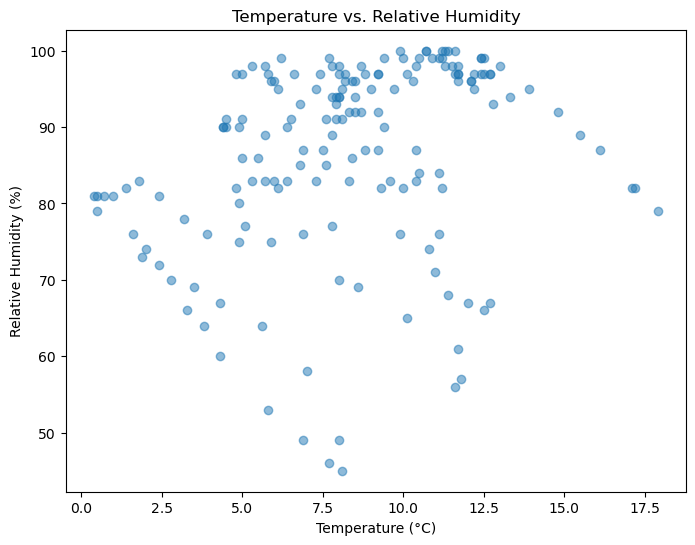

In [16]:
# Scatter Plot of Temperature vs. Relative Humidity

plt.figure(figsize=(8, 6))
plt.scatter(df['temperature_2m'], df['relativehumidity_2m'], alpha=0.5)
plt.title('Temperature vs. Relative Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.show()


In [17]:
# Step 7: Resample Data to Daily Averages

daily_avg = df.resample('D').mean()
daily_avg.head()


temperature_2m  relativehumidity_2m  precipitation
time                                                          
2023-01-01        8.658333            83.000000       0.045833
2023-01-02        7.858333            84.000000       0.025000
2023-01-03        9.558333            96.916667       0.391667
2023-01-04       12.954167            94.333333       0.095833
2023-01-05        9.783333            92.125000       0.000000

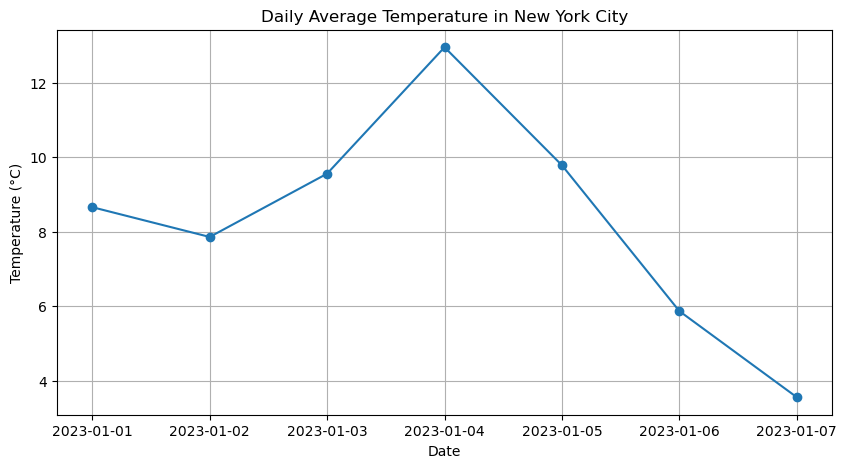

In [18]:
# Plot Daily Average Temperature

plt.figure(figsize=(10, 5))
plt.plot(daily_avg.index, daily_avg['temperature_2m'], marker='o')
plt.title('Daily Average Temperature in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


In [19]:
# Step 8: Compare with Another Location (Los Angeles)

# Coordinates for Los Angeles
latitude_la = 34.0522
longitude_la = -118.2437

params_la = {
    'latitude': latitude_la,
    'longitude': longitude_la,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/Los_Angeles'
}

response_la = requests.get(base_url, params=params_la)

# Load and clean Los Angeles data
data_la = response_la.json()
hourly_data_la = data_la['hourly']
df_la = pd.DataFrame(hourly_data_la)

df_la['time'] = pd.to_datetime(df_la['time'])
df_la.set_index('time', inplace=True)
#df_la.fillna(method='ffill', inplace=True)
df_la.ffill()

temperature_2m  relativehumidity_2m  precipitation
time                                                                   
2023-01-01 00:00:00            13.3                   92            2.0
2023-01-01 01:00:00            13.2                   93            0.7
2023-01-01 02:00:00            12.4                   94            0.0
2023-01-01 03:00:00            11.1                   94            0.0
2023-01-01 04:00:00            10.8                   94            0.0
...                             ...                  ...            ...
2023-01-07 19:00:00            13.4                   73            0.0
2023-01-07 20:00:00            11.3                   83            0.0
2023-01-07 21:00:00            10.4                   80            0.0
2023-01-07 22:00:00            12.8                   51            0.0
2023-01-07 23:00:00             9.3                   74            0.0

[168 rows x 3 columns]

In [20]:
# Resample Los Angeles Data to Daily Averages

daily_avg_la = df_la.resample('D').mean()


In [21]:
# Combine DataFrames for Comparison

combined_temp = pd.DataFrame({
    'New York': daily_avg['temperature_2m'],
    'Los Angeles': daily_avg_la['temperature_2m']
})


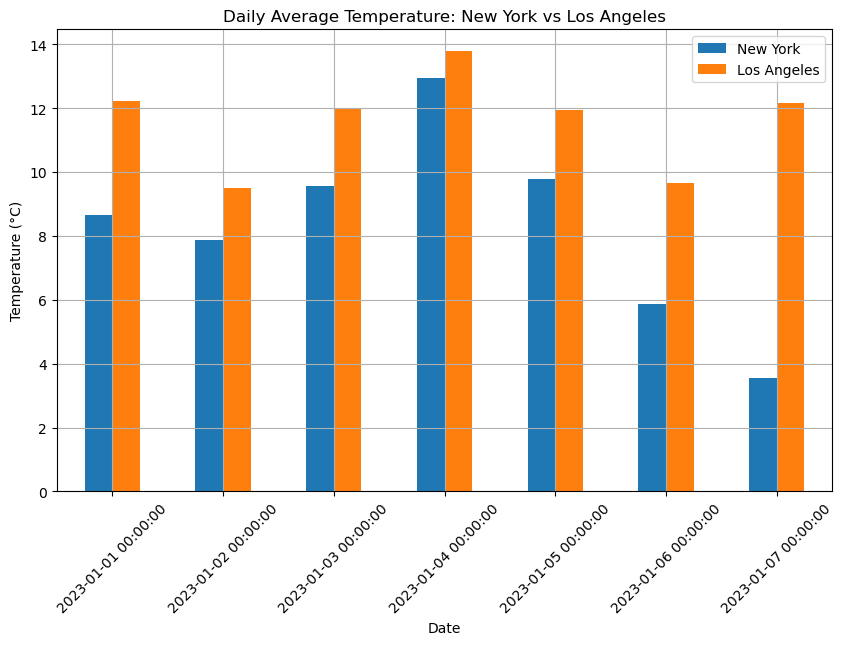

In [22]:
# Plot Comparison of Daily Average Temperature

combined_temp.plot(kind='bar', figsize=(10, 6))
plt.title('Daily Average Temperature: New York vs Los Angeles')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [23]:
# Step 9: Advanced Analysis - Temperature Difference

# Calculate Temperature Difference
combined_temp['Temp Difference'] = combined_temp['Los Angeles'] - combined_temp['New York']
combined_temp


New York  Los Angeles  Temp Difference
time                                               
2023-01-01   8.658333    12.233333         3.575000
2023-01-02   7.858333     9.495833         1.637500
2023-01-03   9.558333    11.970833         2.412500
2023-01-04  12.954167    13.775000         0.820833
2023-01-05   9.783333    11.950000         2.166667
2023-01-06   5.866667     9.662500         3.795833
2023-01-07   3.554167    12.154167         8.600000

In [24]:
# Step 10: Save Data to CSV (Optional)

# Save New York data
df.to_csv('new_york_weather.csv')

# Save Los Angeles data
df_la.to_csv('los_angeles_weather.csv')


## Conclusion

In this exercise, we:

- Accessed and retrieved data from the **Open-Meteo API**.
- Cleaned and preprocessed JSON data using **pandas**.
- Performed exploratory data analysis and visualization.
- Compared weather patterns between **New York City** and **Los Angeles**.

---

**Next Steps**:

- **Extend the Date Range**: Analyze seasonal trends by fetching data over several months.
- **Fetch Additional Variables**: Include wind speed, atmospheric pressure, or other interesting variables.
- **Forecasting**: Use statistical methods or machine learning models to forecast future weather patterns.
- **Global Analysis**: Compare data from other global cities to gain broader insights.


## Exercises for Students

Now it's your turn! Below are some exercises to reinforce what you've learned. Try to complete them without looking at the solutions.

### Exercise: Compare Rainfall Between London and Seattle

- **Objective**: Compare the total weekly rainfall between London and Seattle over a full year.
- **Tasks**:
  1. **Fetch Data**: Retrieve hourly precipitation data for London and Seattle for the year 2022.
     - **London Coordinates**: Latitude `51.5074`, Longitude `-0.1278`
     - **Seattle Coordinates**: Latitude `47.6062`, Longitude `-122.3321`
  2. **Data Cleaning**: Convert the time columns to datetime objects and set them as the index. Handle any missing values.
  3. **Resample Data**: Resample the hourly data to weekly totals.
  4. **Visualization**: Plot the weekly total precipitation for both cities on the same graph.
  5. **Analysis**: Determine which city had more rainfall overall and identify any interesting patterns.

**Note**: Remember to handle any API limitations, such as data availability or rate limits, and to be mindful of the size of the data you're requesting.

### Tips:

- **API Parameters**: Make sure to adjust the parameters like `latitude`, `longitude`, `start_date`, `end_date`, `hourly`, and `timezone` as needed.
- **Error Handling**: Always check if your API requests are successful before proceeding.
- **Data Storage**: Consider saving your DataFrames to CSV files for future analysis.
- **Visualization**: Customize your plots with titles, labels, legends, and gridlines for better readability.

Happy coding!


### Retrieve hourly precipitation data for London for the year 2022

In [28]:
# Step 11: Retrieve hourly precipitation data for London 

# Coordinates for London
latitude_lon = 51.5074
longitude_lon = -0.1278

# Date range
start_date = '2022-01-01'
end_date = '2022-12-31'  # year 2022 data

# Variables to fetch
hourly_variables = ['precipitation']

params_lon = {
    'latitude': latitude_lon,
    'longitude': longitude_lon,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/Los_Angeles'
}

response_lon = requests.get(base_url, params=params_lon)

# Load and clean london data
data_lon = response_lon.json()
hourly_data_lon = data_lon['hourly']
df_lon = pd.DataFrame(hourly_data_lon)

df_lon['time'] = pd.to_datetime(df_lon['time'])
df_lon.set_index('time', inplace=True)
df_lon.ffill()

precipitation
time                              
2022-01-01 00:00:00            0.0
2022-01-01 01:00:00            0.0
2022-01-01 02:00:00            0.0
2022-01-01 03:00:00            0.0
2022-01-01 04:00:00            0.0
...                            ...
2022-12-31 19:00:00            0.0
2022-12-31 20:00:00            0.0
2022-12-31 21:00:00            0.0
2022-12-31 22:00:00            0.0
2022-12-31 23:00:00            0.0

[8760 rows x 1 columns]

In [29]:
# Summary Statistics
df_lon.describe()

precipitation
count    8760.000000
mean        0.075753
std         0.404520
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        14.700000

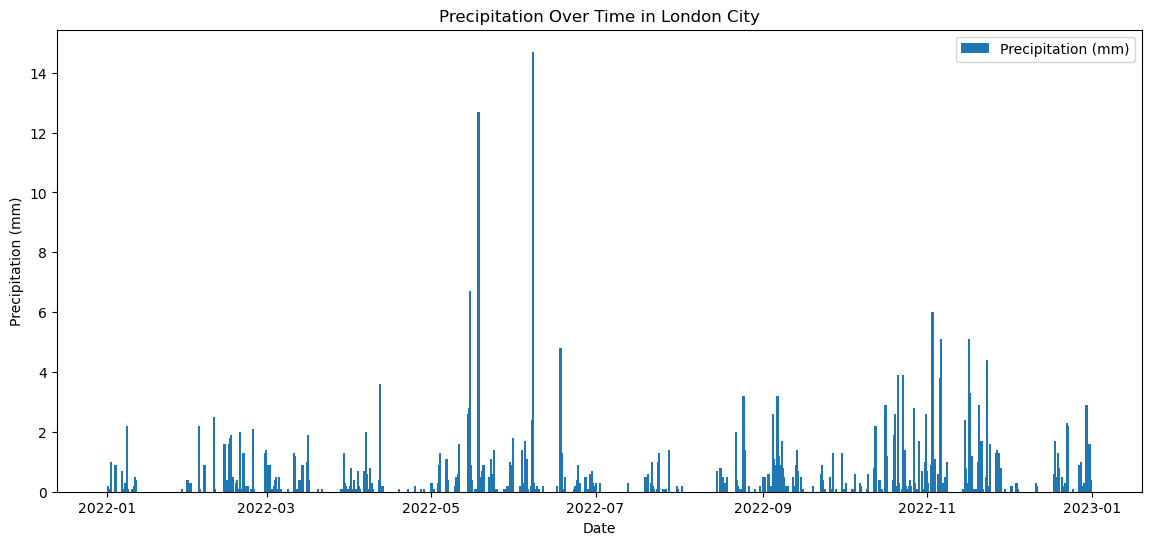

In [30]:
# Plot Precipitation Over Time

plt.figure(figsize=(14, 6))
plt.bar(df_lon.index, df_lon['precipitation'], label='Precipitation (mm)')
plt.title('Precipitation Over Time in London City')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()

In [31]:
# Step 12: Resample London Data to Weekly Averages

weekly_avg_lon = df_lon.resample('W').mean()
weekly_avg_lon.head()

precipitation
time                     
2022-01-02       0.045833
2022-01-09       0.076786
2022-01-16       0.018452
2022-01-23       0.000000
2022-01-30       0.004762

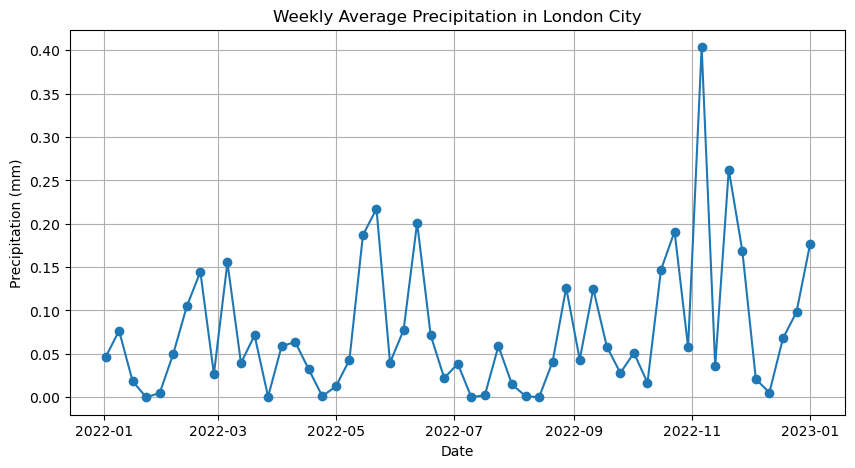

In [32]:
# Plot Weekly Average Temperature

plt.figure(figsize=(10, 5))
plt.plot(weekly_avg_lon.index, weekly_avg_lon['precipitation'], marker='o')
plt.title('Weekly Average Precipitation in London City')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.grid(True)
plt.show()

### Retrieve hourly precipitation data for Seattle for the year 2022

In [34]:
# Step 13: Retrieve hourly precipitation data for Seattle 

# Coordinates for Seattle
latitude_se = 47.6062
longitude_se = -122.3321

# Date range
start_date = '2022-01-01'
end_date = '2022-12-31'  # year 2022 data

# Variables to fetch
hourly_variables = ['precipitation']

params_se = {
    'latitude': latitude_se,
    'longitude': longitude_se,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/Los_Angeles'
}

response_se = requests.get(base_url, params=params_se)

# Load and clean london data
data_se = response_se.json()
hourly_data_se = data_se['hourly']
df_se = pd.DataFrame(hourly_data_se)

df_se['time'] = pd.to_datetime(df_se['time'])
df_se.set_index('time', inplace=True)
df_se.ffill()

precipitation
time                              
2022-01-01 00:00:00            0.0
2022-01-01 01:00:00            0.0
2022-01-01 02:00:00            0.0
2022-01-01 03:00:00            0.0
2022-01-01 04:00:00            0.0
...                            ...
2022-12-31 19:00:00            0.0
2022-12-31 20:00:00            0.0
2022-12-31 21:00:00            0.0
2022-12-31 22:00:00            0.0
2022-12-31 23:00:00            0.0

[8760 rows x 1 columns]

In [35]:
# Summary Statistics
df_se.describe()

precipitation
count    8760.000000
mean        0.129132
std         0.463708
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         7.700000

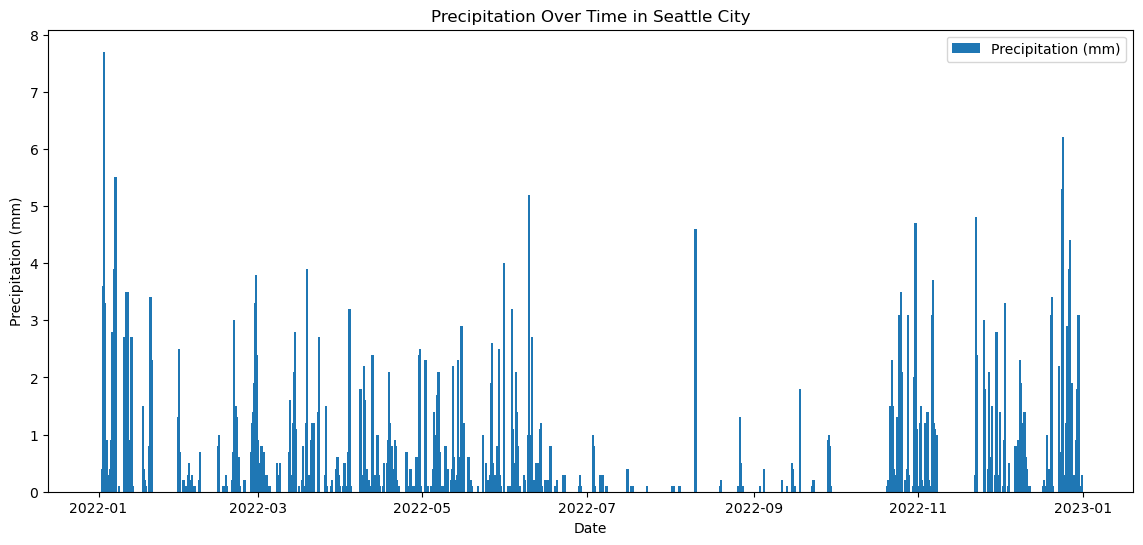

In [36]:
# Plot Precipitation Over Time

plt.figure(figsize=(14, 6))
plt.bar(df_se.index, df_se['precipitation'], label='Precipitation (mm)')
plt.title('Precipitation Over Time in Seattle City')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()

In [37]:
# Step 14: Resample Seattle Data to Weekly Averages

weekly_avg_se = df_se.resample('W').mean()
weekly_avg_se.head()

precipitation
time                     
2022-01-02       0.797917
2022-01-09       0.605952
2022-01-16       0.270833
2022-01-23       0.093452
2022-01-30       0.039286

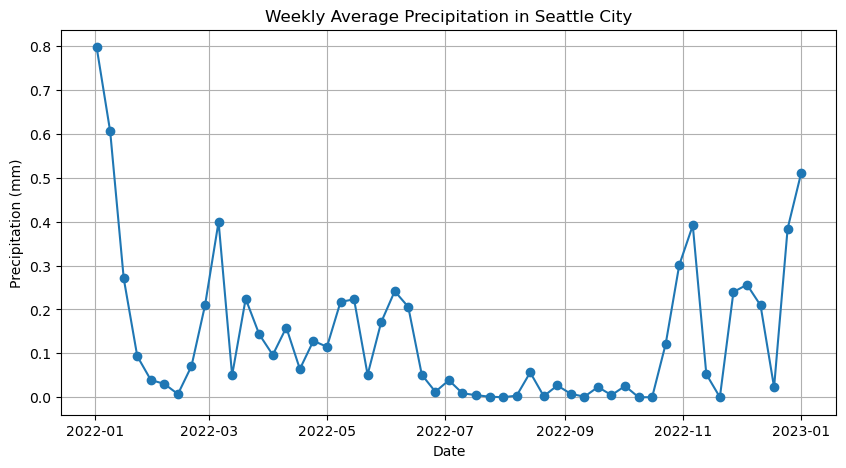

In [38]:
# Plot Weekly Average Temperature

plt.figure(figsize=(10, 5))
plt.plot(weekly_avg_se.index, weekly_avg_se['precipitation'], marker='o')
plt.title('Weekly Average Precipitation in Seattle City')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.grid(True)
plt.show()

In [39]:
# Step 15: Combine DataFrames for Comparison

combined_precipitation = pd.DataFrame({
    'London': weekly_avg_lon['precipitation'],
    'Seattle': weekly_avg_se['precipitation']
})


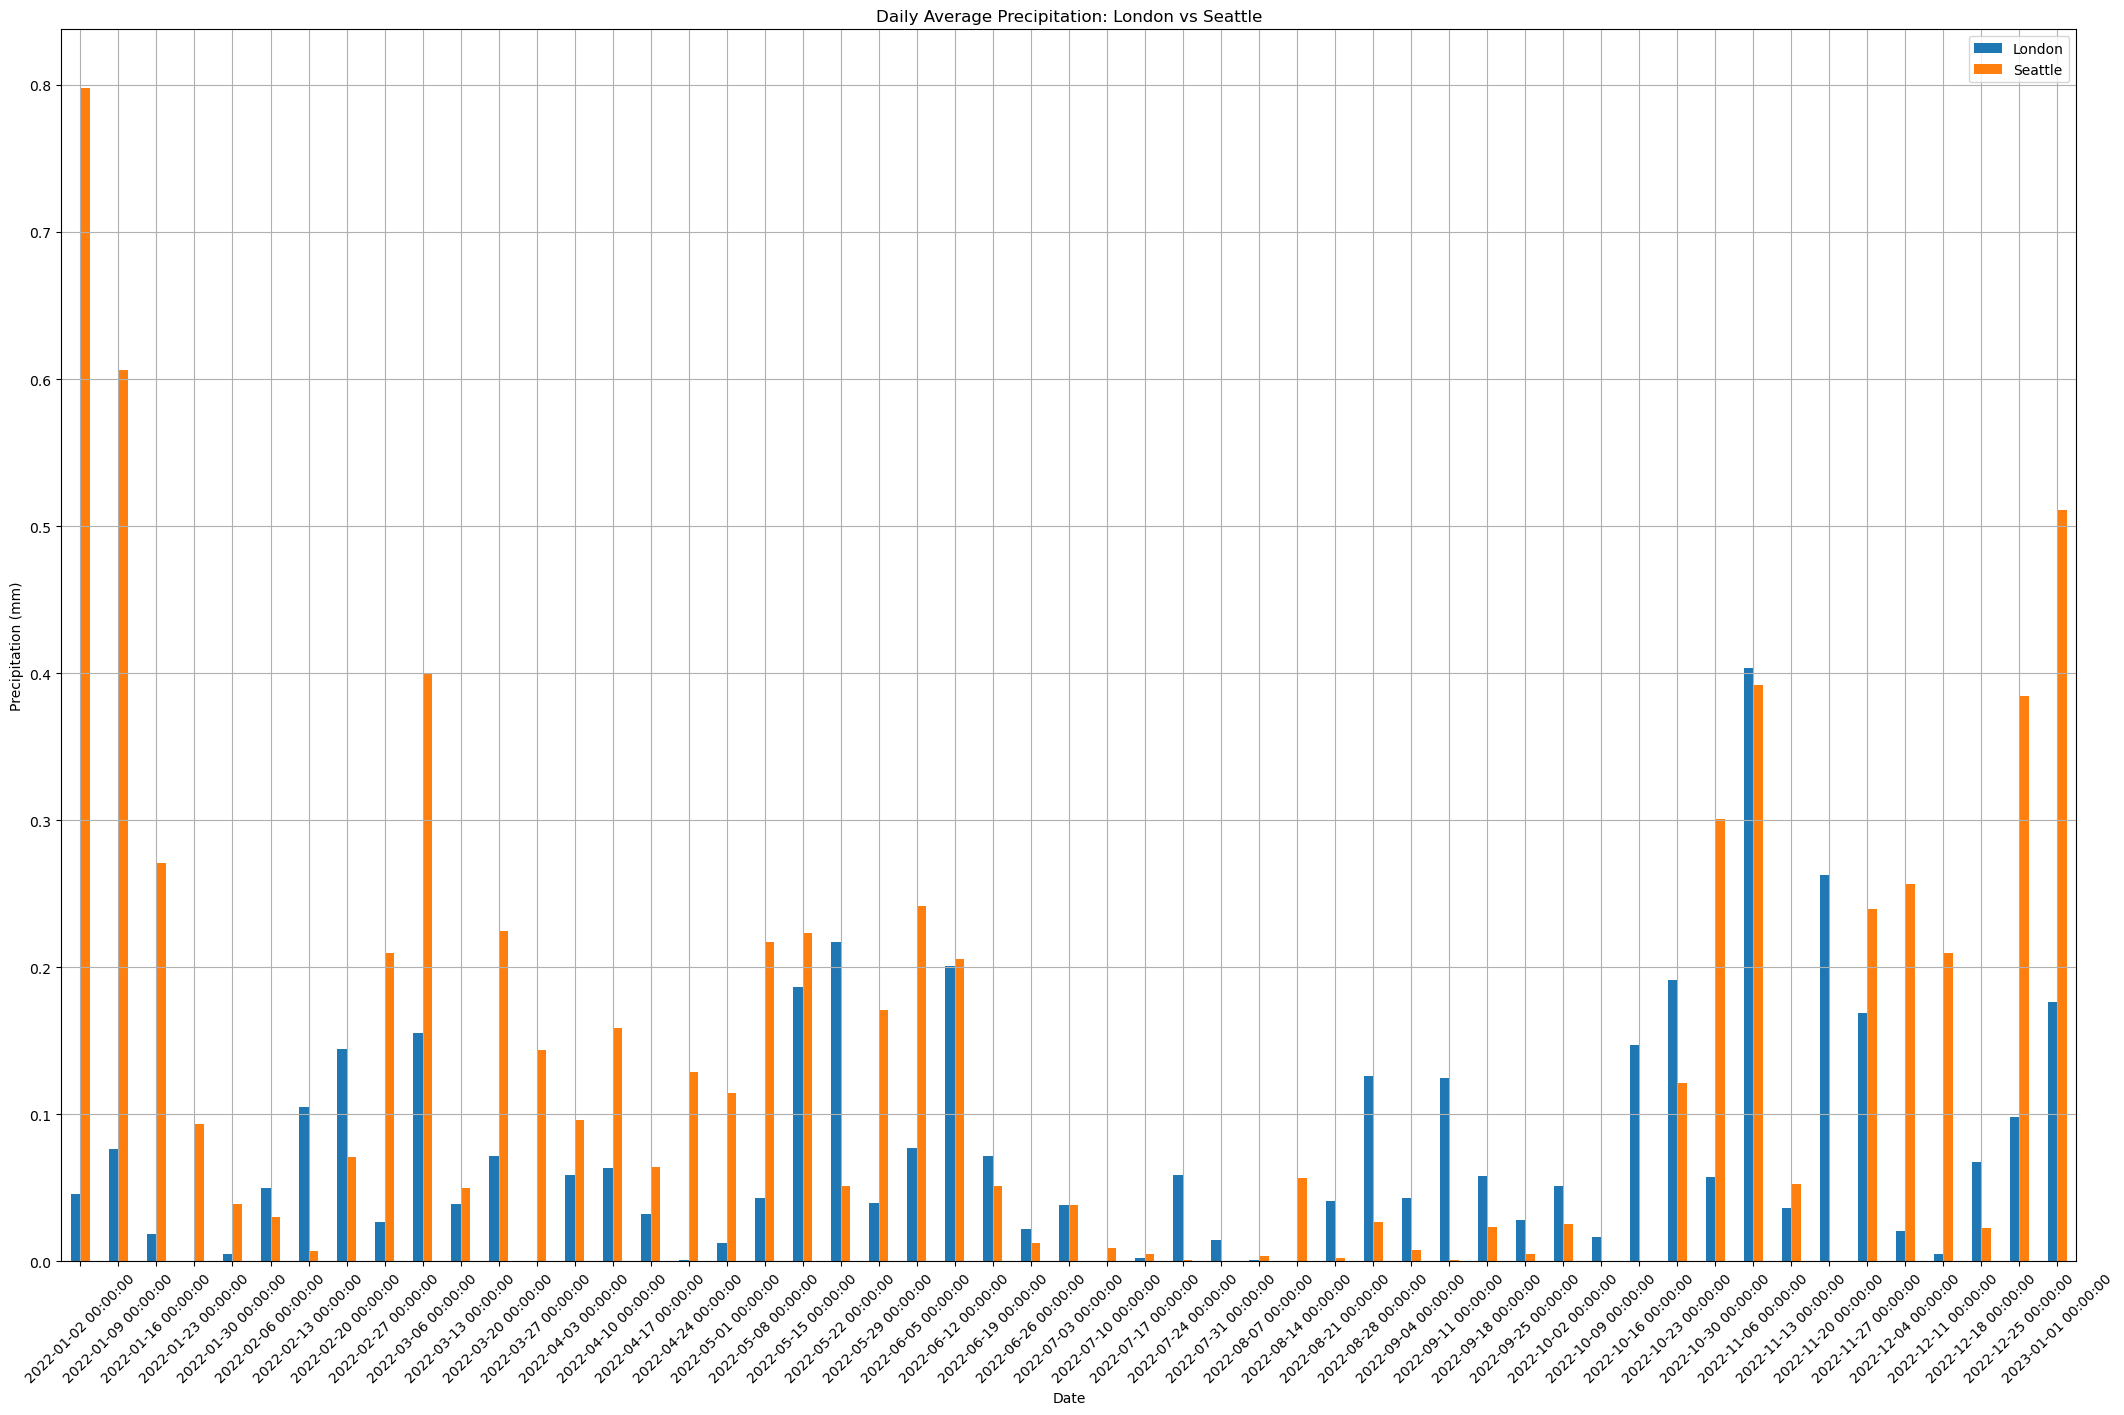

In [40]:
# Plot Comparison of Daily Average Precipitation

combined_precipitation.plot(kind='bar', figsize=(26, 16))
plt.title('Daily Average Precipitation: London vs Seattle')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [41]:
# Step 16: Analysis - Precipitation Difference

# Calculate Precipitation Difference
combined_precipitation['Precipitation Difference'] = combined_precipitation['London'] - combined_precipitation['Seattle']
combined_precipitation.head()

London   Seattle  Precipitation Difference
time                                                    
2022-01-02  0.045833  0.797917                 -0.752083
2022-01-09  0.076786  0.605952                 -0.529167
2022-01-16  0.018452  0.270833                 -0.252381
2022-01-23  0.000000  0.093452                 -0.093452
2022-01-30  0.004762  0.039286                 -0.034524

In [42]:
# No of weeks Seattle has more Precipitation than London
pweeks = len(combined_precipitation[combined_precipitation['Precipitation Difference'] < 0])
print(f'No of weeks Seattle has more Precipitation than London: {pweeks}')

No of weeks Seattle has more Precipitation than London: 31


In [43]:
# No of weeks Seattle has less Precipitation than London
pweeks = len(combined_precipitation[combined_precipitation['Precipitation Difference'] > 0])
print(f'No of weeks Seattle has less Precipitation than London: {pweeks}')

No of weeks Seattle has less Precipitation than London: 21


In [44]:
# No of weeks Seattle and London has same or no Precipitation
pweeks = len(combined_precipitation[combined_precipitation['Precipitation Difference'] == 0])
print(f'No of weeks Seattle and London has same or no Precipitation: {pweeks}')

No of weeks Seattle and London has same or no Precipitation: 1


### Analysis Details

- Which city had more rainfall overall?: **Seattle**
- In 2022, Seattle has 31 weeks of precipitation while London has only 21 weeks of precipitation
- Most of the weeks, Seattle has more precipitation compared to London
- Precipitation in both Seattle and London is less than 0.1 mm most of the period between June and September
- Seattle has precipitation over 0.4 mm in December and January